In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
## torchvision related imports
import torchvision.transforms.functional as F
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
from torchvision.utils import make_grid
## models and transforms
from torchvision.transforms.functional import convert_image_dtype
from torchvision.models.segmentation import fcn_resnet50

In [5]:
## utilities for multiple images
def img_show(images):
    if not isinstance(images, list):
        ## generalise cast images to list
        images = [images]
    fig, axis = plt.subplots(ncols=len(images), squeeze=False)
    for i, image in enumerate(images):
        image = image.detach() # detached from current DAG, no gradient
        image = F.to_pil_image(image)
        axis[0, i].imshow(np.asarray(image))
        axis[0, i].set(xticklabels=[], yticklabels=[],xticks=[], yticks=[])

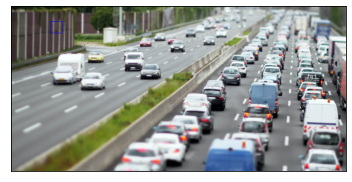

In [11]:
## get an image on which segmentation needs to be done
img1 = read_image("car1.jpg")
img1 = read_image("cars.jfif")
box_car = torch.tensor([ [170, 70, 220, 120]], dtype=torch.float) ## (xmin,ymin,xmax,ymax)
colors = ["blue"]
check_box = draw_bounding_boxes(img1, box_car, colors=colors,width=2)
img_show(check_box)
## batch for images
batch_imgs = torch.stack([img1])
batch_torch = convert_image_dtype(batch_imgs,dtype=torch.float)